In [10]:
import pandas as pd
import numpy as np
import os
import time
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data=pd.read_csv("drive/My Drive/Machine Learning-Colab/Sentimental Analysis/movie_data.csv")

***Information About Data***

In [5]:
print ("Number of Data Points :", data.shape[0])
print ("Number of Features /Variables:" ,data.shape[1])

Number of Data Points : 50000
Number of Features /Variables: 2


***Data Preprocessing***

In [ ]:
lmtzr = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalpha()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += lmtzr.lemmatize(word) + " "
        data[column][index] = string


In [8]:
start_time = time.clock()
data['review'] = data['review'].apply(remove_punctuation)
print("Time for Punctuation removal",(time.clock() - start_time)/60, "minutes")
start_time = time.clock()
for index, row in data.iterrows():
    nlp_preprocessing(row['review'], index, 'review')
print("Time for Preprocesing",(time.clock() - start_time)/60, "minutes")

Time for Punctuation removal 0.84782265 minutes


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Time for Preprocesing 120.33746326666666 minutes


In [ ]:
pd.to_hdf('movie_data.h5','data')

***New Starting***

In [2]:
data=pd.read_hdf('movie_data.h5','data')

In [3]:
data.shape

(50000, 2)

In [4]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
Y=data['sentiment']

***BOW Model***

In [6]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data['review'])

In [7]:
X.shape

(50000, 164728)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=.2,random_state=42)

In [10]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(40000, 164728) (40000,)
(10000, 164728) (10000,)


***RBF Kernel***

In [11]:
start_time = time.clock()
model_svm = svm.SVC(C=1,gamma=1)
model_svm.fit(X_train,y_train)
y_pred= model_svm.predict(X_test)
print((time.clock() - start_time)/60, "minutes")

102.20228001622887 minutes


In [12]:
print("Accuracy",model_svm.score(X_test,y_test))

Accuracy 0.5065


In [20]:
svm_pkl_model=open("svm_model_rbf_bow.pkl","wb")

In [21]:
pickle.dump(model_svm,svm_pkl_model)

In [22]:
svm_pkl_model.close()

***Linear Kernel***

In [23]:
start_time = time.clock()
model_svm = svm.SVC(kernel='linear',C=1,gamma=1)
model_svm.fit(X_train,y_train)
print((time.clock() - start_time)/60, "minutes")

144.38460584875347 minutes


In [24]:
print("Accuracy",model_svm.score(X_test,y_test))

Accuracy 0.8625


In [25]:
svm_pkl_model=open("svm_model_linear_bow.pkl","wb")
pickle.dump(model_svm,svm_pkl_model)
svm_pkl_model.close()

***Tf-Idf Model***

In [8]:
tfidf_review_vectorizer_train1 = TfidfVectorizer()
tfidf_review_features_train1= tfidf_review_vectorizer_train1.fit_transform(data['review'])

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(tfidf_review_features_train1, Y,)
print (X_train1.shape, y_train1.shape)
print (X_test1.shape, y_test1.shape)

***Linear kernel***

In [27]:
start_time = time.clock()
model_svm = svm.SVC(kernel='linear',C=1,gamma=1)
model_svm.fit(X_train1,y_train1)
print((time.clock() - start_time)/60, "minutes")
print("Accuracy:",model_svm.score(X_test1,y_test1))

26.57927562000556 minutes
Accuracy: 0.896


In [28]:
svm_pkl_model=open("svm_model_linear_TfIDF.pkl","wb")
pickle.dump(model_svm,svm_pkl_model)
svm_pkl_model.close()

***Rbf Kernel***

In [29]:
start_time = time.clock()
model_svm = svm.SVC(C=1,gamma=1)
model_svm.fit(X_train1,y_train1)
print((time.clock() - start_time)/60, "minutes")
print("Accuracy:",model_svm.score(X_test1,y_test1))

52.326281867188605 minutes
Accuracy: 0.89736


In [30]:
svm_pkl_model=open("svm_model_rbf_TfIDF.pkl","wb")
pickle.dump(model_svm,svm_pkl_model)
svm_pkl_model.close()

# Naive bayes Model

***Tf-Idf Model***

In [35]:
start_time = time.clock()
clf = MultinomialNB()
clf.fit(X_train1, y_train1)
print("Accuracy:",clf.score(X_test1,y_test1))
print((time.clock() - start_time)/60, "minutes")

Accuracy: 0.86528
0.0027276288708283874 minutes


In [36]:
nb_pkl_model=open("nb_model_multinb.pkl","wb")
pickle.dump(clf,nb_pkl_model)
nb_pkl_model.close()

***Bow Model***

In [37]:
start_time = time.clock()
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("Accuracy:",clf.score(X_test,y_test))
print((time.clock() - start_time)/60, "minutes")

Accuracy: 0.8598
0.01507356905543323 minutes


In [38]:
nb_pkl_model=open("nb_model_multinb_Bow.pkl","wb")
pickle.dump(clf,nb_pkl_model)
nb_pkl_model.close()

# Dimensionality Reduction

***Latent Semantic analysis on BOW Model***

In [11]:
start_time = time.clock()
svd = TruncatedSVD(n_components=1000, random_state=42)
bow_X_svd=svd.fit_transform(X)
print((time.clock() - start_time)/60, "minutes")

4.982865505514079 minutes


In [12]:
svd.singular_values_.size

1000

In [13]:
bow_X_svd.size

50000000

In [14]:
arr=svd.explained_variance_ratio_

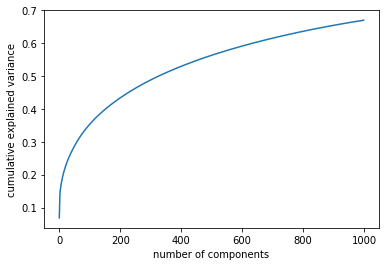

In [15]:
plt.plot(np.cumsum(arr))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(bow_X_svd, Y,test_size=.2,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(40000, 1000) (40000,)
(10000, 1000) (10000,)


SVM-Linear model

In [17]:
start_time = time.clock()
model_svm = svm.SVC(kernel='linear',C=1,gamma=1)
model_svm.fit(X_train,y_train)
print((time.clock() - start_time)/60, "minutes")
print("Accuracy:",model_svm.score(X_test,y_test))

339.4825693216163 minutes
Accuracy: 0.8677


In [19]:
svm_pkl_model=open("SVM_Bow_svd_linear.pkl","wb")
pickle.dump(model_svm,svm_pkl_model)
svm_pkl_model.close()

SVM-RBf model

In [20]:
start_time = time.clock()
model_svm = svm.SVC(C=1,gamma=1)
model_svm.fit(X_train,y_train)
print((time.clock() - start_time)/60, "minutes")
print("Accuracy:",model_svm.score(X_test,y_test))

102.48039741238603 minutes
Accuracy: 0.507


In [22]:
svm_pkl_model=open("SVM_Bow_svd_rbf.pkl","wb")
pickle.dump(model_svm,svm_pkl_model)
svm_pkl_model.close()

Naive Bayes-Multinomial

In [23]:
start_time = time.clock()
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("Accuracy:",clf.score(X_test,y_test))
print((time.clock() - start_time)/60, "minutes")

ValueError: Input X must be non-negative

In [ ]:
nb_pkl_model=open("nb_multinb_Bow_svd.pkl","wb")
pickle.dump(clf,nb_pkl_model)
nb_pkl_model.close()

***LSA on TF-Idf Model***

In [22]:
start_time = time.clock()
svd = TruncatedSVD(n_components=1200, random_state=42)
tfidf_X_svd=svd.fit_transform(tfidf_review_features_train1)
print((time.clock() - start_time)/60, "minutes")

5.798072893612114 minutes


In [23]:
arr=svd.explained_variance_ratio_

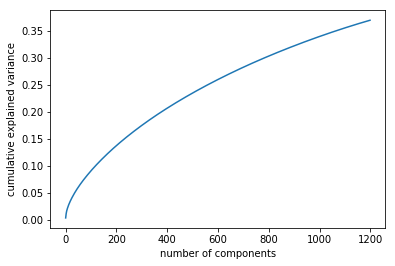

In [24]:
plt.plot(np.cumsum(arr))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [24]:
X_train

array([[ 2.12447051, -0.03228676,  0.29067576, ...,  0.24663943,
         0.04047853,  0.04541219],
       [ 4.05783146, -0.04988795, -1.5744011 , ..., -0.10864942,
         0.01682121, -0.06681876],
       [ 3.20489633,  1.77343513, -2.66986934, ..., -0.03232666,
         0.03877565, -0.02720532],
       ...,
       [ 6.65206367, -3.61785917, -0.84308064, ...,  0.28863736,
         0.16373976,  0.00965855],
       [ 1.04586061, -0.81502337, -0.55916851, ...,  0.11974926,
        -0.01409467, -0.15647588],
       [ 2.65948237,  2.45103453, -2.32014083, ..., -0.01964958,
        -0.05120869, -0.01799557]])

# PCA

***PCA on Bow***

In [26]:
start_time = time.clock()
pca = PCA(n_components=150)
pca_X_bow=pca.fit_transform(tfidf_review_features_train1)
print((time.clock() - start_time)/60, "minutes")

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [ ]:
arr=pca.explained_variance_ratio_
plt.plot(np.cumsum(arr))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()